<a href="https://colab.research.google.com/github/tombackert/Algos/blob/master/Project_3_Logistic_Regression_Analysis_on_Pima_Indian_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3: Logistic Regression Analysis on Pima Indian Diabetes Dataset

## 1. Introduction
In this project, we explore logistic regression, a statistical method for binary classification. We'll apply this technique to the Pima Indian Diabetes dataset to predict whether individuals have diabetes based on various medical predictors. This analysis will help us understand how different features influence the probability of having diabetes and how logistic regression can be used to model these relationships.


## 2. Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import Dense

2.17.0


## 3. Load in the Data

In [3]:
# Load the dataset
url = 'https://drive.google.com/uc?id=1N17mRVTD8qkgW31OoIxFszF_8LtsrTwz'
data = pd.read_csv(url)
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## 4. Clean and Prepare the Data

In [4]:
# Drop rows with missing values
data.dropna(inplace=True)

## 5. Inspect the Data

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

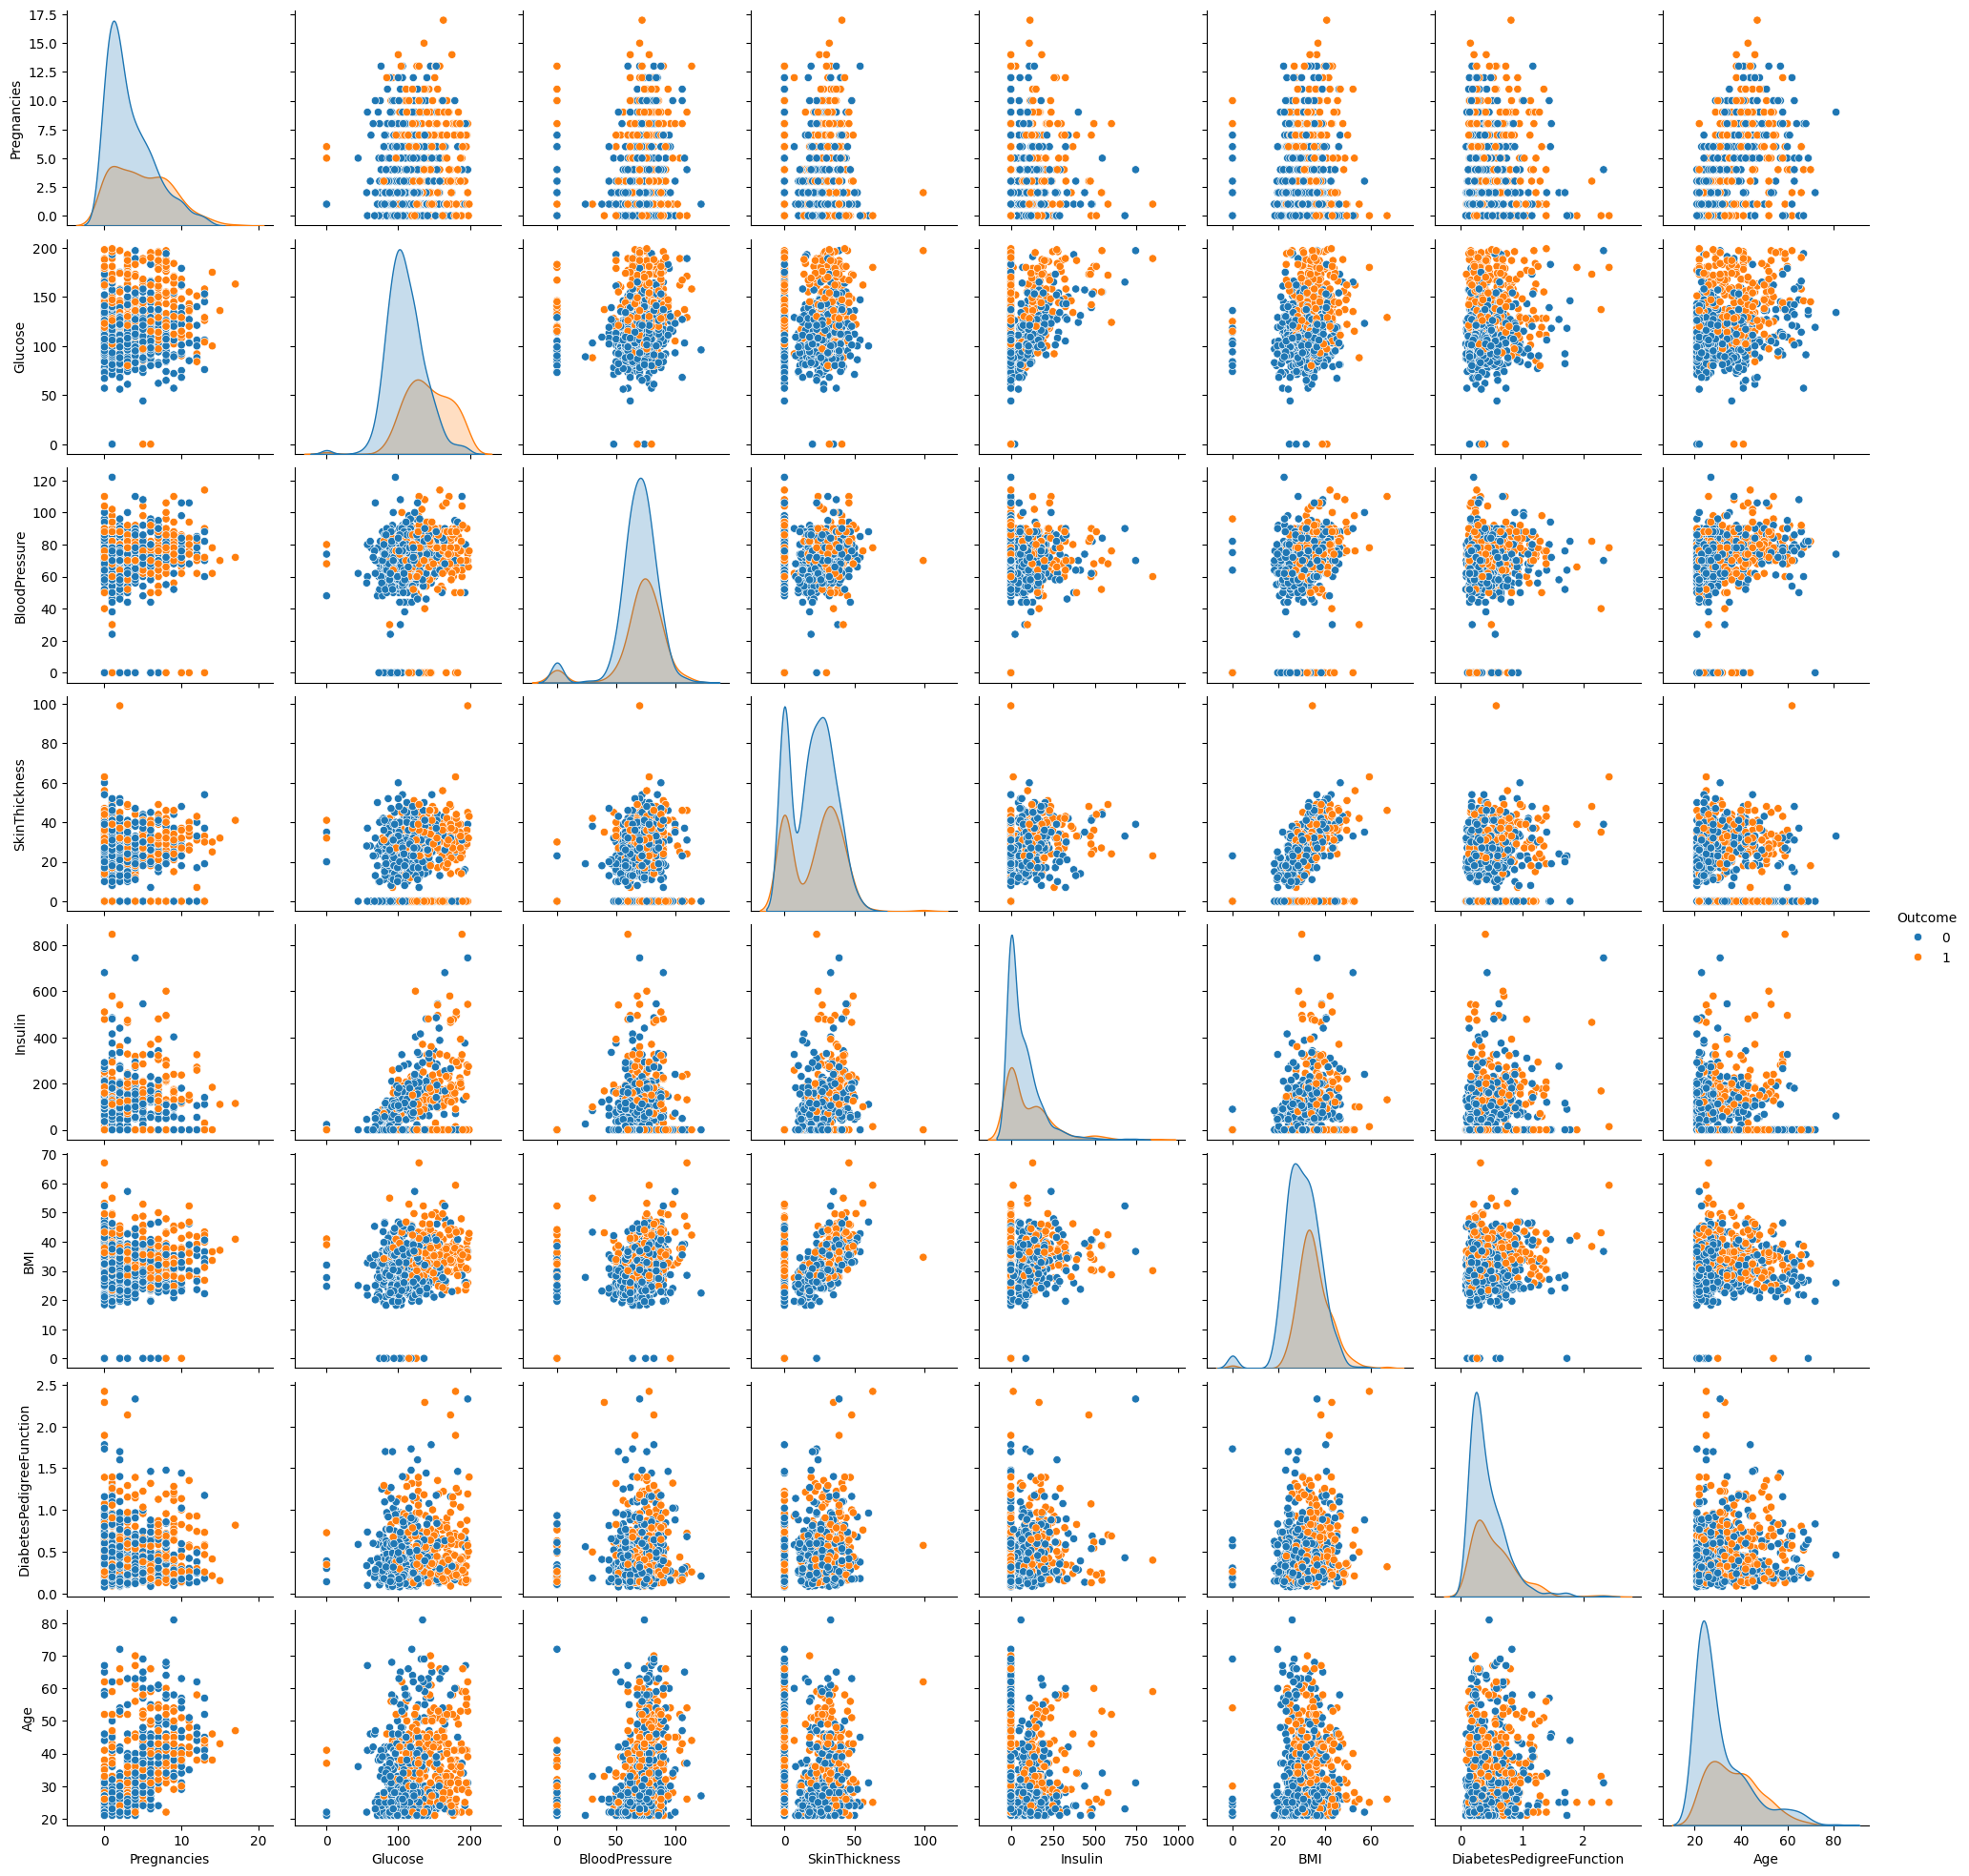

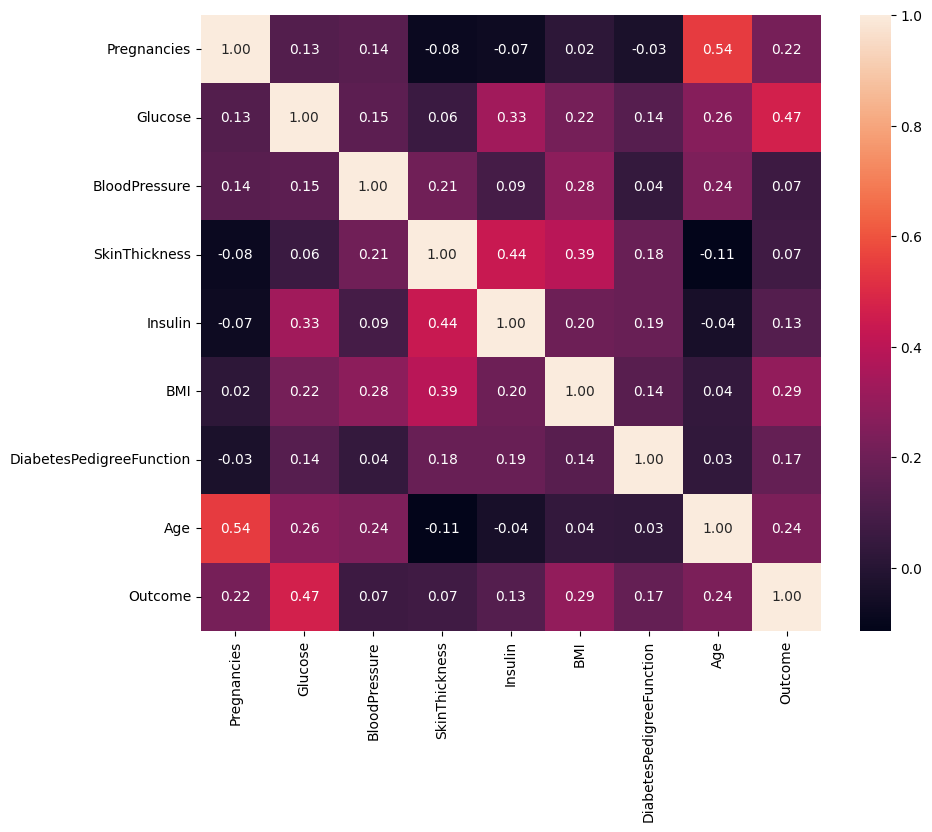

In [5]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue='Outcome')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

## 6. Data Split

In [6]:
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)

In [7]:
train_data.describe().transpose()

count        mean         std     min        25%  \
Pregnancies               614.0    3.863192    3.382738   0.000    1.00000   
Glucose                   614.0  121.636808   32.016768   0.000  100.00000   
BloodPressure             614.0   68.576547   19.911136   0.000   62.00000   
SkinThickness             614.0   20.314332   16.082796   0.000    0.00000   
Insulin                   614.0   78.301303  115.537423   0.000    0.00000   
BMI                       614.0   32.106678    7.712639   0.000   27.40000   
DiabetesPedigreeFunction  614.0    0.475573    0.329461   0.078    0.24525   
Age                       614.0   33.364821   11.593037  21.000   24.00000   
Outcome                   614.0    0.356678    0.479409   0.000    0.00000   

                              50%        75%     max  
Pregnancies                 3.000    6.00000   17.00  
Glucose                   118.500  140.75000  199.00  
BloodPressure              72.000   80.00000  122.00  
SkinThickness              23.000   32.00000   99.00  
Insulin                     7.000  127.75000  846.00  
BMI                        32.150   36.57500   59.40  
DiabetesPedigreeFunction    0.377    0.63925    2.42  
Age                        29.000   41.00000   72.00  
Outcome                     0.000    1.00000    1.00

## 7. Select a Few Features to Work On and Split Features from Labels

In [30]:
train_features = train_data[['BMI','Age','Glucose','Insulin']]
test_features = test_data[['BMI','Age','Glucose','Insulin']]

train_labels = train_data['Outcome']
test_labels = test_data['Outcome']

## 8. Normalization

The Normalization Layer
The preprocessing.Normalization layer is a clean and simple way to build that preprocessing into your model.

The first step is to create the layer:

In [31]:
normalizer = Normalization(axis=-1)

Then .adapt() it to the data:

In [32]:
normalizer.adapt(np.array(train_features))

The following code calculates the mean and variance, and stores them in the layer.

In [33]:
print(normalizer.mean.numpy())

[[ 32.106678  33.364822 121.63681   78.3013  ]]


When the layer is called, it returns the input data with each feature independently normalized:



In [34]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 42.9  22.  199.    0. ]]

Normalized: [[ 1.4  -0.98  2.42 -0.68]]


## 9. Logistic Regression

### Q2: Single Variable Logistic Regression

In [35]:
one_feature = np.array(train_features['Glucose'])


one_feature_normalizer = Normalization(input_shape=[1,], axis=None)
one_feature_normalizer.adapt(one_feature)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
one_feature_model = tf.keras.Sequential([
    one_feature_normalizer
])

nb_classes = 2
number_of_features = 1 #X_train.shape[1]
train_lables_in_classes = tf.keras.utils.to_categorical( train_labels,nb_classes )

In [37]:
one_feature_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization)      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (16.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3 (16.00 B)

In [16]:
one_feature_model.add(Dense(nb_classes,activation = 'sigmoid',input_dim = number_of_features))
one_feature_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#one_feature_model.compile(optimizer='adam', loss='log_loss', metrics=['accuracy'])

one_feature_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7 (32.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 3 (16.00 B)

In [65]:
# Define hyperparameters
learning_rates = [0.01, 0.001, 0.0001]
epochs_list = [40, 80]
batch_sizes = [4, 16]

In [66]:
## Trainingsloop for multi combinations of hyperparameter

import itertools

results = []

for lr, epochs_num, batch_size in itertools.product(learning_rates, epochs_list, batch_sizes):
    print(f"Training with learning rate={lr}, epochs={epochs_num}, batch size={batch_size}")

    # Create a new model
    one_feature_model = tf.keras.Sequential([
        one_feature_normalizer
    ])

    # Add the Dense layer
    one_feature_model.add(Dense(nb_classes, activation='sigmoid', input_dim=number_of_features))

    # Create optimizer with specific learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    # Compile the model
    one_feature_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = one_feature_model.fit(
        train_features['Glucose'], train_lables_in_classes,
        epochs=epochs_num,
        batch_size=batch_size,
        verbose=0,  # Suppress output
        validation_split=0.2
    )

    # Evaluate the model on the test data
    test_loss, test_accuracy = one_feature_model.evaluate(
        test_features['Glucose'],
        test_lables_in_classes, verbose=0
    )

    # Predict on test data
    test_pred = one_feature_model.predict(test_features['Glucose'])
    preds_classes = np.argmax(test_pred, axis=-1)
    cm = metrics.confusion_matrix(test_labels, preds_classes)

    # Save results
    results.append({
        'learning_rate': lr,
        'epochs': epochs_num,
        'batch_size': batch_size,
        'history': history,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'confusion_matrix': cm
    })

Training with learning rate=0.01, epochs=40, batch size=4


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with learning rate=0.01, epochs=40, batch size=16
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training with learning rate=0.01, epochs=80, batch size=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training with learning rate=0.01, epochs=80, batch size=16


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Training with learning rate=0.001, epochs=40, batch size=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Training with learning rate=0.001, epochs=40, batch size=16


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Training with learning rate=0.001, epochs=80, batch size=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training with learning rate=0.001, epochs=80, batch size=16


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Training with learning rate=0.0001, epochs=40, batch size=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Training with learning rate=0.0001, epochs=40, batch size=16


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training with learning rate=0.0001, epochs=80, batch size=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Training with learning rate=0.0001, epochs=80, batch size=16


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


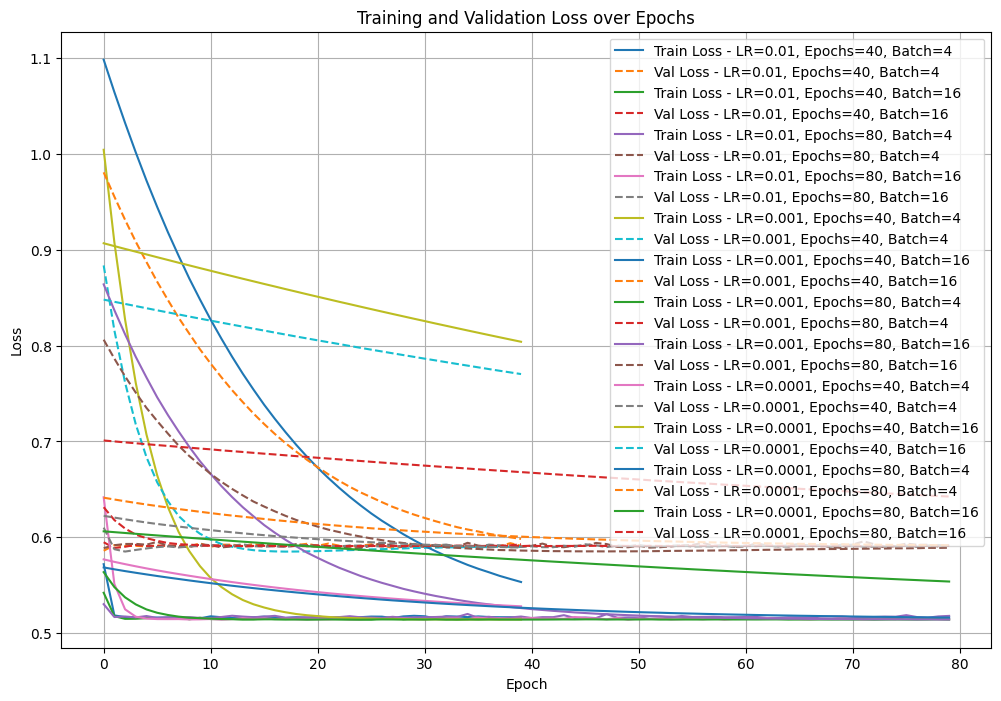

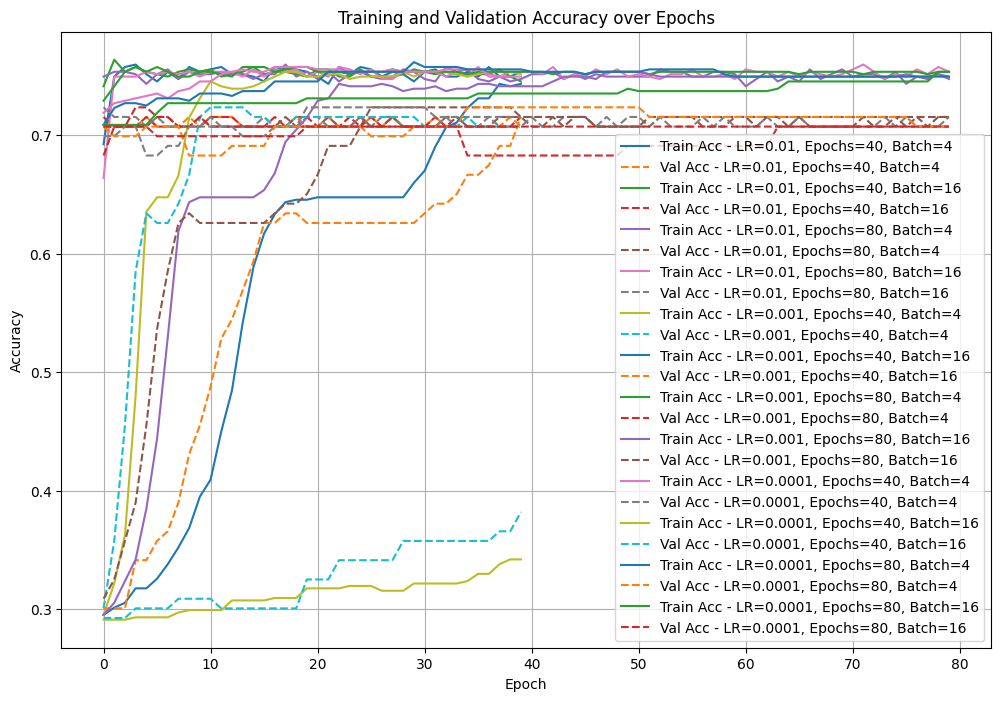

In [67]:
def plot_loss_curves(results):
    plt.figure(figsize=(12, 8))
    for result in results:
        history = result['history']
        lr = result['learning_rate']
        epochs_num = result['epochs']
        batch_size = result['batch_size']

        label = f"LR={lr}, Epochs={epochs_num}, Batch={batch_size}"
        plt.plot(history.history['loss'], label=f"Train Loss - {label}")
        plt.plot(history.history['val_loss'], label=f"Val Loss - {label}", linestyle='--')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss_curves(results)

def plot_accuracy_curves(results):
    plt.figure(figsize=(12, 8))
    for result in results:
        history = result['history']
        lr = result['learning_rate']
        epochs_num = result['epochs']
        batch_size = result['batch_size']

        label = f"LR={lr}, Epochs={epochs_num}, Batch={batch_size}"
        plt.plot(history.history['accuracy'], label=f"Train Acc - {label}")
        plt.plot(history.history['val_accuracy'], label=f"Val Acc - {label}", linestyle='--')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_accuracy_curves(results)

In [68]:
summary = []
for result in results:
    lr = result['learning_rate']
    epochs_num = result['epochs']
    batch_size = result['batch_size']
    history = result['history']
    test_loss = result['test_loss']
    test_accuracy = result['test_accuracy']

    final_train_loss = history.history['loss'][-1]
    final_train_accuracy = history.history['accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]
    final_val_accuracy = history.history['val_accuracy'][-1]

    summary.append({
        'learning_rate': lr,
        'epochs': epochs_num,
        'batch_size': batch_size,
        'train_loss': final_train_loss,
        'train_accuracy': final_train_accuracy,
        'val_loss': final_val_loss,
        'val_accuracy': final_val_accuracy,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy
    })

df_summary = pd.DataFrame(summary)
display(df_summary)

learning_rate  epochs  batch_size  train_loss  train_accuracy  val_loss  \
0          0.0100      40           4    0.516314        0.753564  0.591181   
1          0.0100      40          16    0.516076        0.745418  0.592828   
2          0.0100      80           4    0.518146        0.747454  0.591701   
3          0.0100      80          16    0.514744        0.753564  0.591297   
4          0.0010      40           4    0.514373        0.751527  0.590509   
5          0.0010      40          16    0.553478        0.743381  0.598416   
6          0.0010      80           4    0.514324        0.753564  0.591074   
7          0.0010      80          16    0.514365        0.749491  0.589217   
8          0.0001      40           4    0.528149        0.749491  0.589403   
9          0.0001      40          16    0.803953        0.342159  0.770268   
10         0.0001      80           4    0.516431        0.749491  0.591740   
11         0.0001      80          16    0.553978        0.753564  0.642575   

    val_accuracy  test_loss  test_accuracy  
0       0.707317   0.517339       0.733766  
1       0.715447   0.516002       0.766234  
2       0.715447   0.516121       0.759740  
3       0.715447   0.515807       0.759740  
4       0.707317   0.515888       0.746753  
5       0.715447   0.544039       0.759740  
6       0.707317   0.516124       0.746753  
7       0.715447   0.515646       0.759740  
8       0.715447   0.529888       0.714286  
9       0.382114   0.789804       0.357143  
10      0.707317   0.520212       0.720779  
11      0.707317   0.565220       0.701299

In [69]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [71]:
def plot_confusion_matrices(results):
    for result in results:
        cm = result['confusion_matrix']
        lr = result['learning_rate']
        epochs_num = result['epochs']
        batch_size = result['batch_size']

        plt.figure()
        cm_plot_labels = ['Normal', 'Diabetes']
        plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title=f'Confusion Matrix\nLR={lr}, Epochs={epochs_num}, Batch={batch_size}')
        plt.show()

Confusion matrix, without normalization
[[89 16]
 [25 24]]


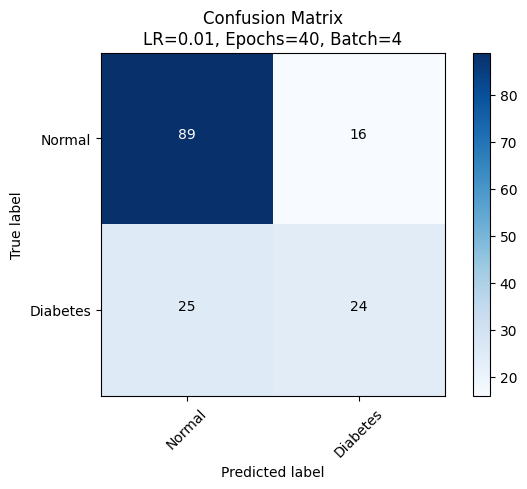

Confusion matrix, without normalization
[[94 11]
 [25 24]]


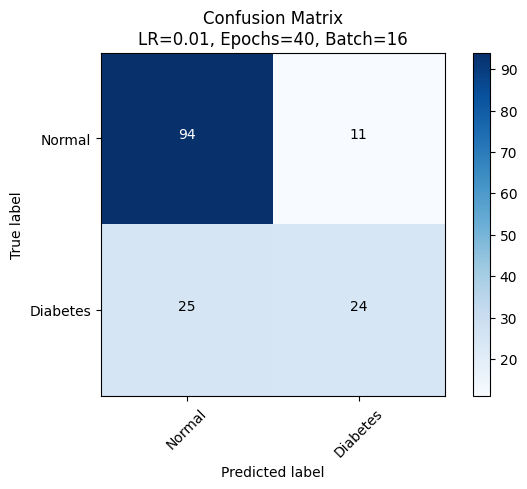

Confusion matrix, without normalization
[[93 12]
 [25 24]]


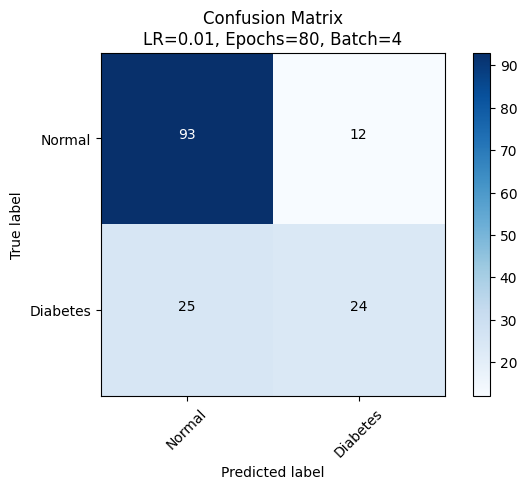

Confusion matrix, without normalization
[[93 12]
 [25 24]]


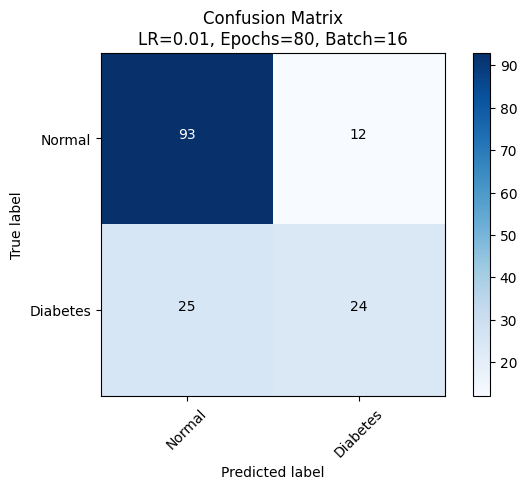

Confusion matrix, without normalization
[[91 14]
 [25 24]]


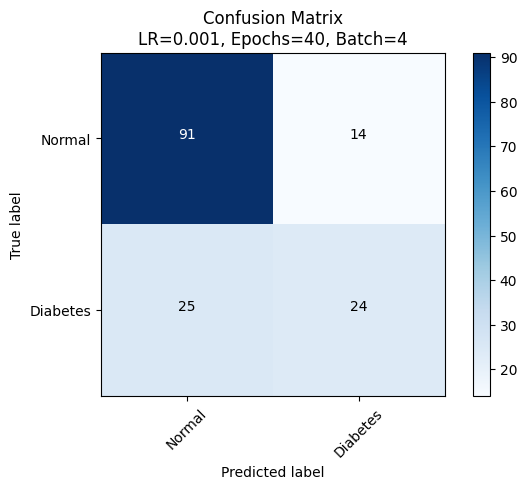

Confusion matrix, without normalization
[[101   4]
 [ 33  16]]


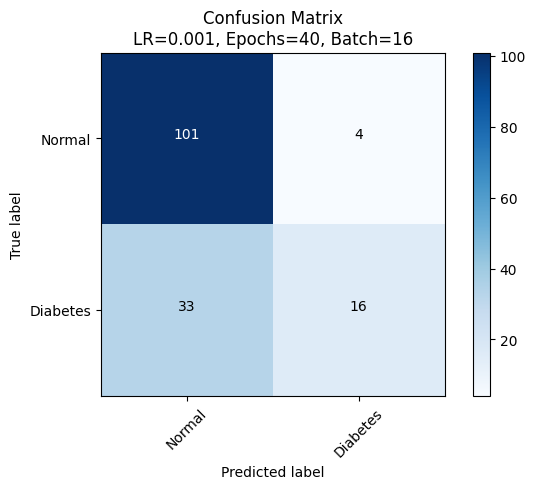

Confusion matrix, without normalization
[[91 14]
 [25 24]]


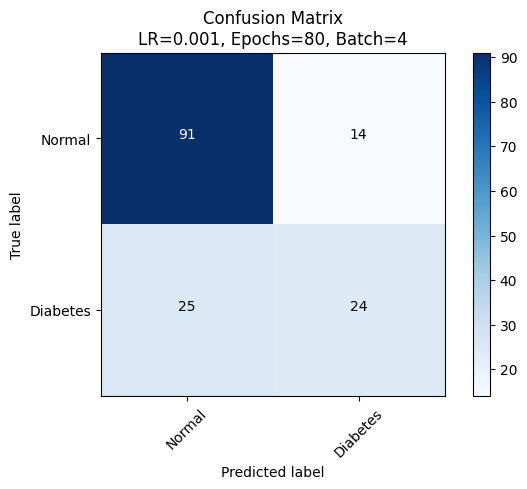

Confusion matrix, without normalization
[[93 12]
 [25 24]]


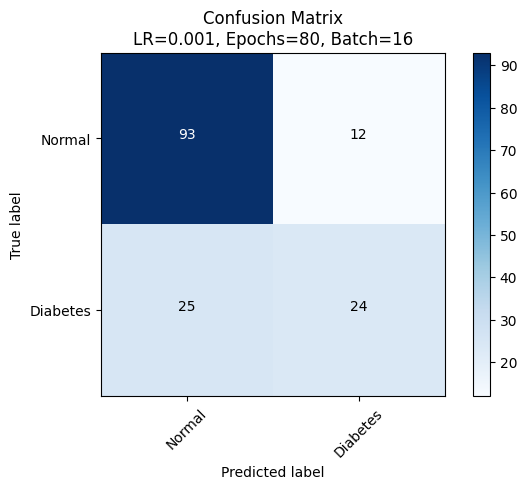

Confusion matrix, without normalization
[[85 20]
 [24 25]]


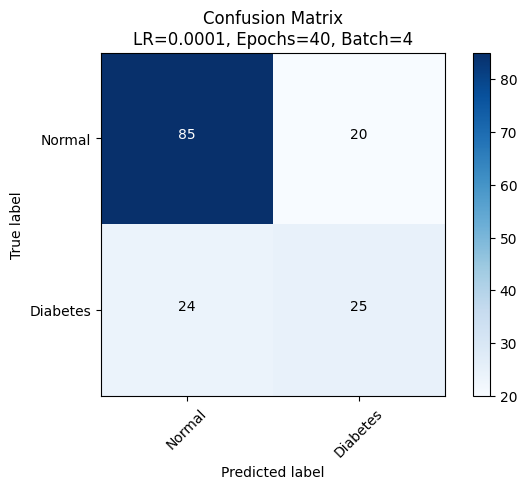

Confusion matrix, without normalization
[[44 61]
 [38 11]]


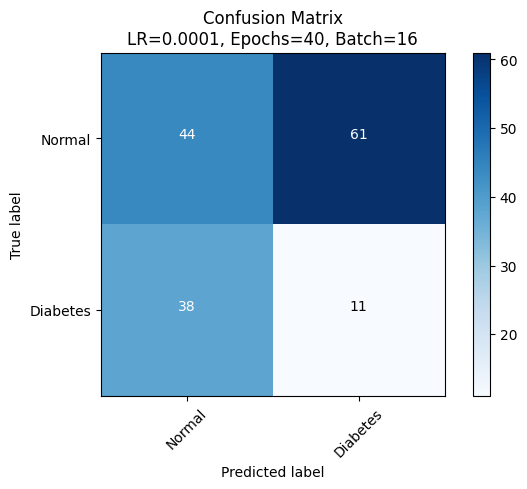

Confusion matrix, without normalization
[[86 19]
 [24 25]]


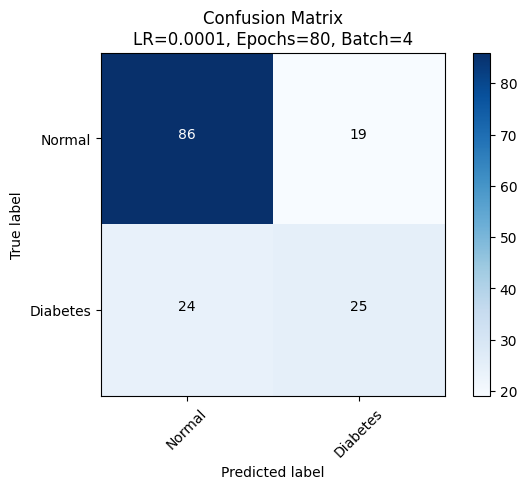

Confusion matrix, without normalization
[[81 24]
 [22 27]]


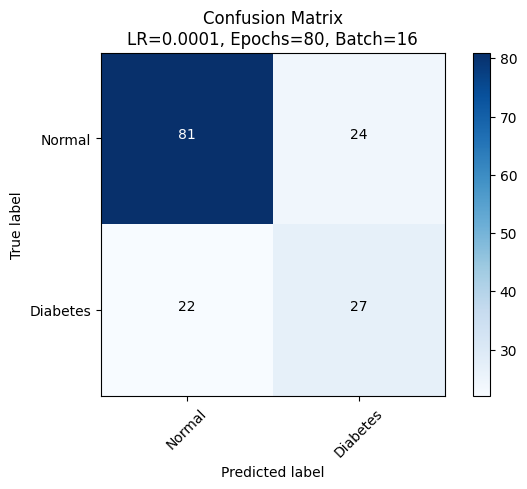

In [72]:
plot_confusion_matrices(results)

Visualize the model's training progress using the stats stored in the history object.

### Q2 Reflection:

The ‘Glucose’ feature measures the plasma glucose concentration after an oral glucose tolerance test. Elevated glucose levels are a primary indicator of diabetes, as the disease affects the body’s ability to regulate blood sugar. Therefore, ‘Glucose’ is inherently a strong predictor of the diabetic condition.

Other features in the dataset, such as ‘Age’ or ‘BMI’, while relevant, do not have as direct a relationship with the onset of diabetes when considered individually. These features may contribute to a multifactorial risk assessment but lack the singular predictive power that ‘Glucose’ possesses in this context.

By systematically exploring different hyperparameter settings, we identified that using ‘Glucose’ as the sole feature with a learning rate of 0.01, 40 epochs, and a batch size of 16 provided the best model performance.

The findings emphasize that even simple models with well-chosen features and optimized hyperparameters can achieve strong performance, which is valuable for developing interpretable and efficient machine learning solutions in healthcare contexts.

### Q3: Multi-variable Logistic Regression

In [79]:
# Select multiple features
selected_features = ['Glucose', 'BMI', 'Age']

# Prepare training and testing data
train_features_multi = train_features[selected_features]
test_features_multi = test_features[selected_features]

In [75]:
# Convert training features to NumPy array
multi_features_array = np.array(train_features_multi)

# Create the normalizer for multiple features
multi_feature_normalizer = Normalization(axis=-1)
multi_feature_normalizer.adapt(multi_features_array)

In [76]:
# Define the number of features
number_of_features = len(selected_features)

# Create the model
multi_feature_model = tf.keras.Sequential([
    multi_feature_normalizer
])

# Convert labels to categorical format
nb_classes = 2
train_labels_in_classes = tf.keras.utils.to_categorical(train_labels, nb_classes)
test_labels_in_classes = tf.keras.utils.to_categorical(test_labels, nb_classes)

# Add the Dense layer to the model
multi_feature_model.add(Dense(nb_classes, activation='sigmoid', input_dim=number_of_features))

# Summarize the model
multi_feature_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization)      │ (614, 3)                    │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7 (32.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7 (32.00 B)

In [77]:
# Define hyperparameters
# same as before
learning_rates = [0.01, 0.001, 0.0001]
epochs_list = [40, 80]
batch_sizes = [4, 16]

In [78]:
# Initialize a list to store results
results_multi_feature = []

for lr, epochs_num, batch_size in itertools.product(learning_rates, epochs_list, batch_sizes):
    print(f"Training with learning rate={lr}, epochs={epochs_num}, batch size={batch_size}")

    # Create a new model for each combination
    multi_feature_model = tf.keras.Sequential([
        multi_feature_normalizer
    ])

    # Add the Dense layer
    multi_feature_model.add(Dense(nb_classes, activation='sigmoid', input_dim=number_of_features))

    # Create optimizer with specific learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    # Compile the model
    multi_feature_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = multi_feature_model.fit(
        train_features_multi, train_labels_in_classes,
        epochs=epochs_num,
        batch_size=batch_size,
        verbose=0,  # Suppress output
        validation_split=0.2
    )

    # Evaluate the model on the test data
    test_loss, test_accuracy = multi_feature_model.evaluate(
        test_features_multi,
        test_labels_in_classes, verbose=0
    )

    # Predict on test data
    test_pred = multi_feature_model.predict(test_features_multi)
    preds_classes = np.argmax(test_pred, axis=-1)
    cm = metrics.confusion_matrix(test_labels, preds_classes)

    # Save results
    results_multi_feature.append({
        'learning_rate': lr,
        'epochs': epochs_num,
        'batch_size': batch_size,
        'history': history,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'confusion_matrix': cm
    })

Training with learning rate=0.01, epochs=40, batch size=4
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step
Training with learning rate=0.01, epochs=40, batch size=16


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Training with learning rate=0.01, epochs=80, batch size=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training with learning rate=0.01, epochs=80, batch size=16


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Training with learning rate=0.001, epochs=40, batch size=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training with learning rate=0.001, epochs=40, batch size=16


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Training with learning rate=0.001, epochs=80, batch size=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training with learning rate=0.001, epochs=80, batch size=16


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Training with learning rate=0.0001, epochs=40, batch size=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training with learning rate=0.0001, epochs=40, batch size=16


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Training with learning rate=0.0001, epochs=80, batch size=4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Training with learning rate=0.0001, epochs=80, batch size=16


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


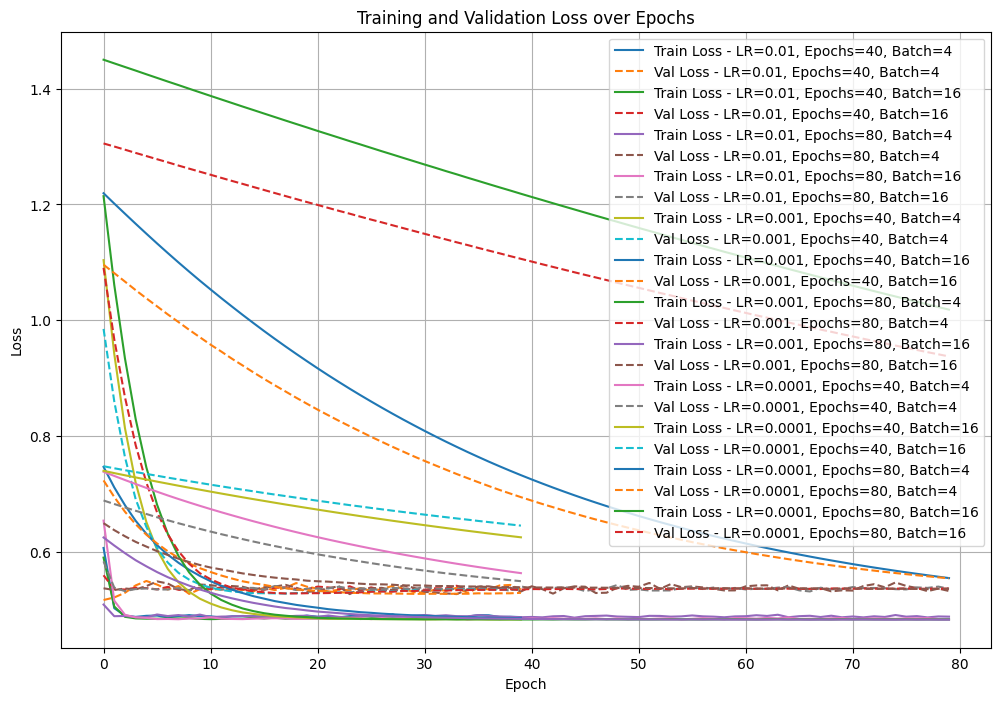

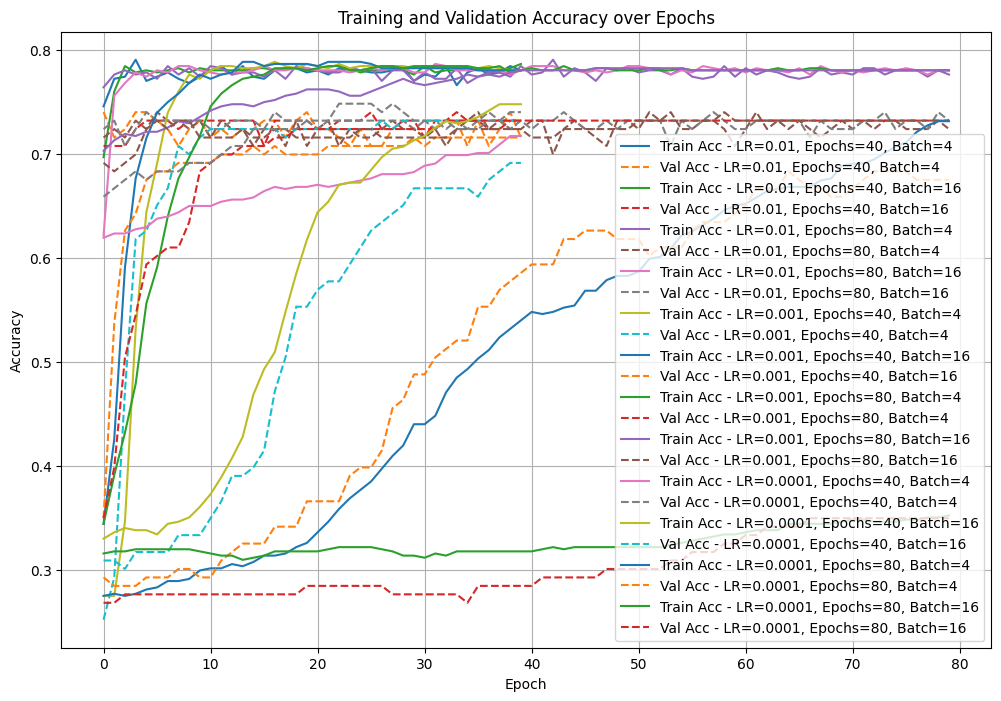

In [80]:
# Plot the loss curves
plot_loss_curves(results_multi_feature)

# Plot the accuracy curves
plot_accuracy_curves(results_multi_feature)

In [82]:
# Summarize the results
summary_multi_feature = []
for result in results:
    lr = result['learning_rate']
    epochs_num = result['epochs']
    batch_size = result['batch_size']
    history = result['history']
    test_loss = result['test_loss']
    test_accuracy = result['test_accuracy']

    final_train_loss = history.history['loss'][-1]
    final_train_accuracy = history.history['accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]
    final_val_accuracy = history.history['val_accuracy'][-1]

    summary.append({
        'learning_rate': lr,
        'epochs': epochs_num,
        'batch_size': batch_size,
        'train_loss': final_train_loss,
        'train_accuracy': final_train_accuracy,
        'val_loss': final_val_loss,
        'val_accuracy': final_val_accuracy,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy
    })

df_summary_multi_feature = pd.DataFrame(summary)
display(df_summary_multi_feature)

learning_rate  epochs  batch_size  train_loss  train_accuracy  val_loss  \
0          0.0100      40           4    0.516314        0.753564  0.591181   
1          0.0100      40          16    0.516076        0.745418  0.592828   
2          0.0100      80           4    0.518146        0.747454  0.591701   
3          0.0100      80          16    0.514744        0.753564  0.591297   
4          0.0010      40           4    0.514373        0.751527  0.590509   
5          0.0010      40          16    0.553478        0.743381  0.598416   
6          0.0010      80           4    0.514324        0.753564  0.591074   
7          0.0010      80          16    0.514365        0.749491  0.589217   
8          0.0001      40           4    0.528149        0.749491  0.589403   
9          0.0001      40          16    0.803953        0.342159  0.770268   
10         0.0001      80           4    0.516431        0.749491  0.591740   
11         0.0001      80          16    0.553978        0.753564  0.642575   
12         0.0100      40           4    0.516314        0.753564  0.591181   
13         0.0100      40          16    0.516076        0.745418  0.592828   
14         0.0100      80           4    0.518146        0.747454  0.591701   
15         0.0100      80          16    0.514744        0.753564  0.591297   
16         0.0010      40           4    0.514373        0.751527  0.590509   
17         0.0010      40          16    0.553478        0.743381  0.598416   
18         0.0010      80           4    0.514324        0.753564  0.591074   
19         0.0010      80          16    0.514365        0.749491  0.589217   
20         0.0001      40           4    0.528149        0.749491  0.589403   
21         0.0001      40          16    0.803953        0.342159  0.770268   
22         0.0001      80           4    0.516431        0.749491  0.591740   
23         0.0001      80          16    0.553978        0.753564  0.642575   
24         0.0100      40           4    0.516314        0.753564  0.591181   
25         0.0100      40          16    0.516076        0.745418  0.592828   
26         0.0100      80           4    0.518146        0.747454  0.591701   
27         0.0100      80          16    0.514744        0.753564  0.591297   
28         0.0010      40           4    0.514373        0.751527  0.590509   
29         0.0010      40          16    0.553478        0.743381  0.598416   
30         0.0010      80           4    0.514324        0.753564  0.591074   
31         0.0010      80          16    0.514365        0.749491  0.589217   
32         0.0001      40           4    0.528149        0.749491  0.589403   
33         0.0001      40          16    0.803953        0.342159  0.770268   
34         0.0001      80           4    0.516431        0.749491  0.591740   
35         0.0001      80          16    0.553978        0.753564  0.642575   

    val_accuracy  test_loss  test_accuracy  
0       0.707317   0.517339       0.733766  
1       0.715447   0.516002       0.766234  
2       0.715447   0.516121       0.759740  
3       0.715447   0.515807       0.759740  
4       0.707317   0.515888       0.746753  
5       0.715447   0.544039       0.759740  
6       0.707317   0.516124       0.746753  
7       0.715447   0.515646       0.759740  
8       0.715447   0.529888       0.714286  
9       0.382114   0.789804       0.357143  
10      0.707317   0.520212       0.720779  
11      0.707317   0.565220       0.701299  
12      0.707317   0.517339       0.733766  
13      0.715447   0.516002       0.766234  
14      0.715447   0.516121       0.759740  
15      0.715447   0.515807       0.759740  
16      0.707317   0.515888       0.746753  
17      0.715447   0.544039       0.759740  
18      0.707317   0.516124       0.746753  
19      0.715447   0.515646       0.759740  
20      0.715447   0.529888       0.714286  
21      0.382114   0.789804       0.357143  
22      0.707317   0.520212       0.720779  


Confusion matrix, without normalization
[[89 16]
 [20 29]]


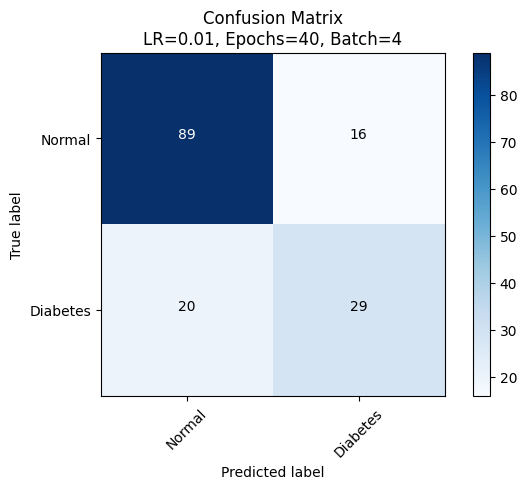

Confusion matrix, without normalization
[[92 13]
 [22 27]]


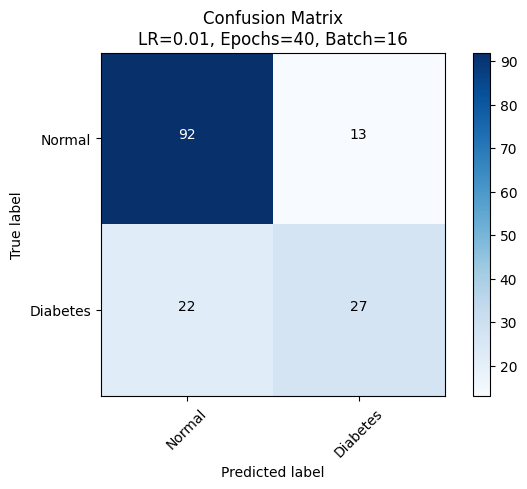

Confusion matrix, without normalization
[[91 14]
 [23 26]]


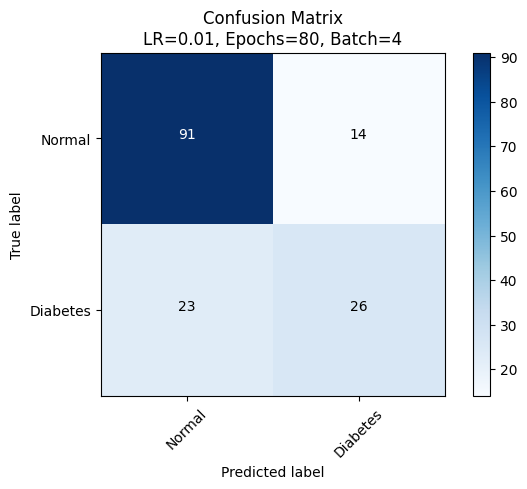

Confusion matrix, without normalization
[[92 13]
 [22 27]]


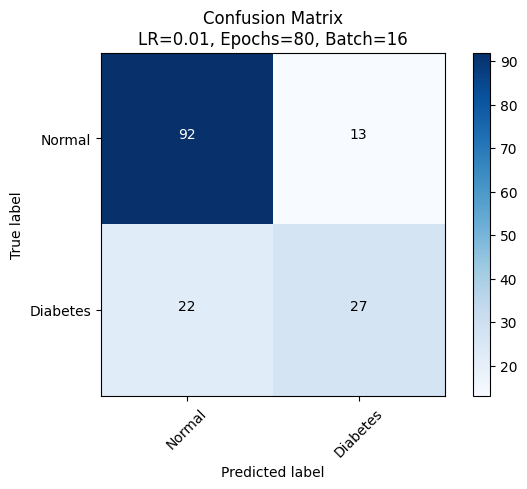

Confusion matrix, without normalization
[[92 13]
 [22 27]]


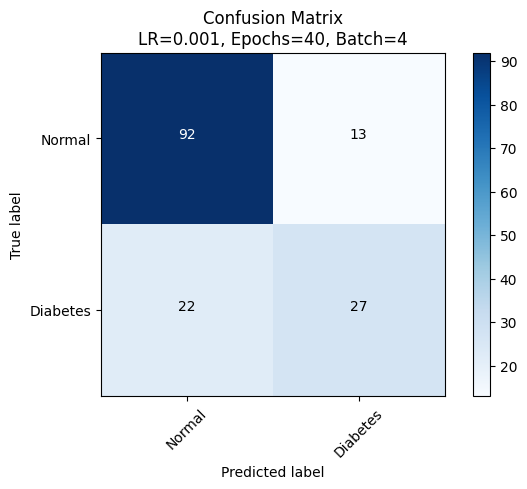

Confusion matrix, without normalization
[[91 14]
 [22 27]]


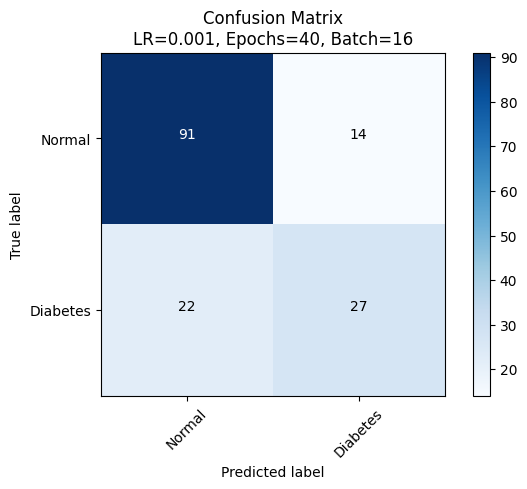

Confusion matrix, without normalization
[[92 13]
 [22 27]]


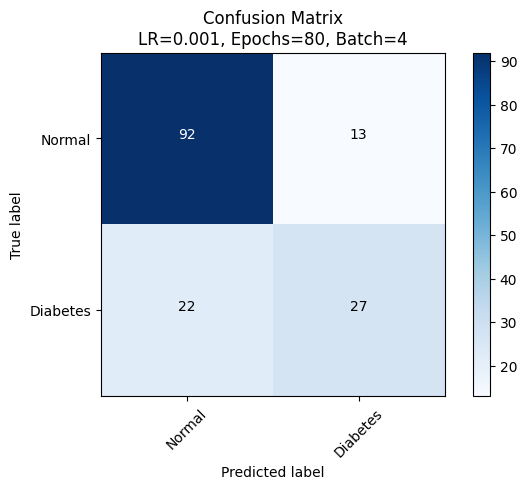

Confusion matrix, without normalization
[[92 13]
 [22 27]]


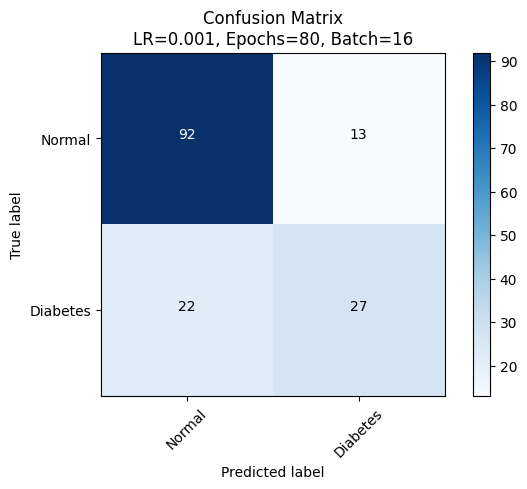

Confusion matrix, without normalization
[[84 21]
 [25 24]]


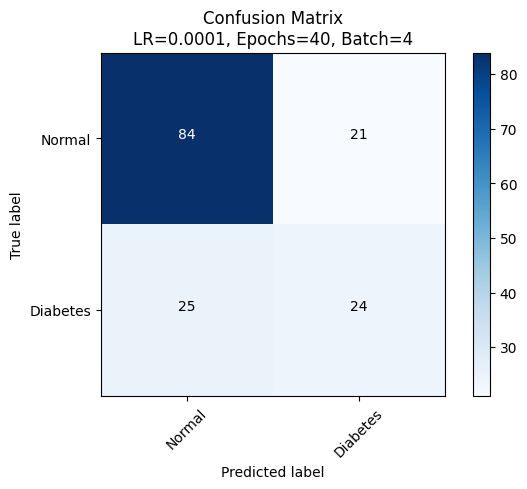

Confusion matrix, without normalization
[[95 10]
 [27 22]]


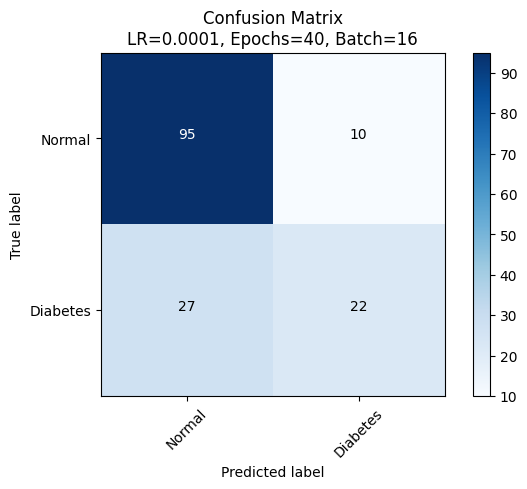

Confusion matrix, without normalization
[[92 13]
 [30 19]]


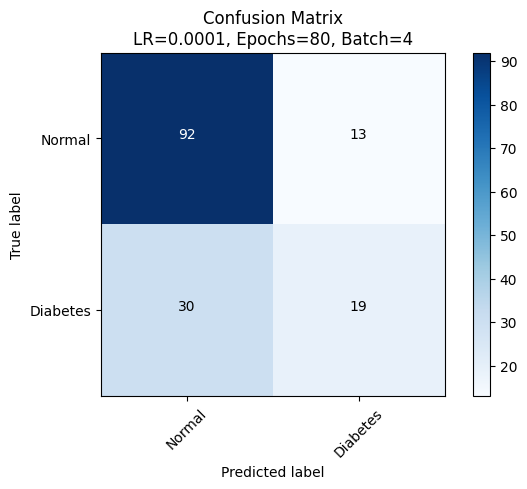

Confusion matrix, without normalization
[[45 60]
 [41  8]]


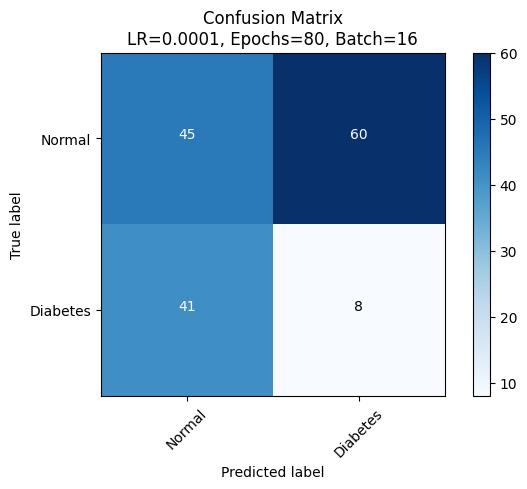

In [84]:
# Call the function to plot
plot_confusion_matrices(results_multi_feature)

### Q3 Reflection:

Upon including multiple features, we noticed that the model detected more actual cases of diabetes. This was evident from the confusion matrices, which showed an increase in true positives—the number of correctly identified diabetic cases. However, despite this improvement in identifying diabetic instances, the overall accuracy did not significantly increase compared to the single-feature model using ‘Glucose’ alone.

The learning curves indicated that the model’s training and validation loss decreased over epochs, and the accuracy improved marginally. The best-performing hyperparameter combination remained the same as in the single-feature model: a learning rate of 0.01, 40 epochs, and a batch size of 16. This combination provided a good balance between convergence speed and model stability.


The limited improvement in overall accuracy suggests that ‘Glucose’ is a highly informative feature on its own. In the context of diabetes prediction, glucose levels are a primary indicator of the disease. The addition of ‘BMI’ and ‘Age’, while relevant, may not have provided substantial new information beyond what ‘Glucose’ already offered.

It’s possible that the additional features introduced some noise or multicollinearity, which could have affected the model’s ability to generalize better. Furthermore, logistic regression assumes a linear relationship between the log-odds of the outcome and the input features. If the relationship between ‘BMI’, ‘Age’, and diabetes is not strictly linear or is influenced by interaction effects, the model may not capture these complexities effectively.

When comparing the logistic regression results to those obtained from linear regression models, several differences in model behavior became apparent. Logistic regression is inherently suited for binary classification tasks, as it models the probability of a categorical outcome. Linear regression, on the other hand, predicts continuous values and is not designed for classification without modifications (e.g., setting thresholds).
Logistic regression provides predicted probabilities for class membership, offering more insight into the model’s confidence in its predictions. Linear regression outputs continuous values that may not correspond well to probabilities, making interpretation less straightforward.

## 10. Q4 Reflection


### Reflective Analysis of Logistic Regression Experiments

Throughout this project, we conducted a series of experiments using logistic regression to predict diabetes occurrence based on the Pima Indian Diabetes dataset.
The analysis involved both single-variable and multi-variable models, with an emphasis on understanding how different features and hyperparameters affect model performance.
We also compared the logistic regression results with linear regression models to highlight differences in model behavior.

### Most Effective Features and Combinations

The experiments demonstrated that the ‘Glucose’ feature was the most effective individual predictor of diabetes.
When we trained a logistic regression model using only ‘Glucose’, it achieved the highest accuracy among all single-feature models.
This aligns with medical knowledge, as elevated glucose levels are a primary indicator of diabetes.
The strong correlation between ‘Glucose’ and the ‘Outcome’ variable made it a powerful standalone predictor.

When we extended the model to include additional features such as ‘BMI’ and ‘Age’, we observed that the model identified more actual cases of diabetes (true positives).
The confusion matrices showed an increase in correctly classified diabetic cases.
However, the overall accuracy did not significantly improve compared to the single-feature model using ‘Glucose’ alone.
This suggests that while ‘BMI’ and ‘Age’ contribute to detecting more diabetic instances, they do not enhance the model’s discriminative ability enough to boost overall accuracy.

### Insights Gained

One key insight is that adding more features does not always lead to better model performance.
In our case, ‘Glucose’ was already highly informative, and additional features like ‘BMI’ and ‘Age’ provided marginal improvements.
This could be because ‘Glucose’ captures the most critical information needed to predict diabetes in this dataset.
The additional features may introduce redundancy or noise, which can complicate the model without offering substantial benefits.

Another important insight is the role of hyperparameters in model training.
We experimented with various learning rates, epochs, and batch sizes.
Consistently, a learning rate of 0.01, 40 epochs, and a batch size of 16 yielded the best performance.
A higher learning rate allowed the model to converge quickly, but too high a rate could cause instability.
The chosen epochs and batch size provided a balance between training efficiency and model accuracy.

Comparing logistic regression with linear regression models revealed that logistic regression is more suitable for classification tasks.
Logistic regression models produced better accuracy and more reliable predictions.
Linear regression, while useful for continuous outcomes, struggled with binary classification because it is not designed to handle categorical target variables effectively.

### Challenges and Unclear Aspects

One of the challenges was understanding why adding more features did not substantially improve accuracy.
Intuitively, including more relevant features should enhance the model’s predictive power.
However, the minimal gains prompted me to consider factors such as feature correlation and multicollinearity.
It became apparent that ‘Glucose’ was so dominant that additional features contributed little new information, and in some cases, may have introduced noise.

Another challenge was hyperparameter tuning. Determining the optimal combination of learning rate, epochs, and batch size required extensive experimentation.
Each hyperparameter impacted the model differently: the learning rate affected convergence speed, epochs influenced the training duration, and batch size impacted the stability of gradient updates.
Balancing these factors to achieve the best performance was a non-trivial task.

Implementing the training loops for multiple hyperparameter combinations also posed difficulties.
Ensuring that each model was correctly initialized and that previous weights did not carry over required careful coding.
Debugging issues related to model initialization and data preprocessing consumed significant time and effort.

### Conclusion

The project provided valuable lessons in feature selection, model optimization, and the importance of aligning the modeling approach with the problem at hand.
The dominance of ‘Glucose’ as a predictive feature highlighted that sometimes, a single well-chosen variable can be as effective as a combination of several features.
This underscores the significance of domain knowledge in feature selection.

I also learned that while logistic regression is effective for classification tasks, especially with well-chosen features, adding more variables does not guarantee improved performance.
It is crucial to assess the contribution of each feature critically.

The challenges faced during hyperparameter tuning and model implementation emphasized the need for meticulous planning and validation in machine learning projects.
Understanding the interplay between different hyperparameters and their impact on model training is essential for developing robust models.

Overall, the project deepened the understanding of logistic regression and its application in medical data analysis.
It reinforced the importance of thoughtful feature selection, careful hyperparameter tuning, and choosing the appropriate model for the task.
While some aspects were challenging, they provided opportunities to enhance the problem-solving skills and analytical thinking, which will be beneficial in future machine learning endeavors.



## 11. Q1 Model Architecture and Evaluation

### Differences Between Logistic Regression and Linear Regression Architectures

Logistic regression and linear regression are foundational algorithms in machine learning and statistics, each designed for specific types of predictive modeling tasks. While they share similarities in their use of independent variables to predict an outcome, their architectures differ significantly due to the nature of the problems they address.

### Linear Regression Architecture

Linear regression is used for predicting continuous numerical outcomes based on one or more predictor variables. The core idea is to establish a linear relationship between the independent variables (features) and the dependent variable (target). This relationship is represented by a straight line in simple linear regression (with one predictor) or a hyperplane in multiple linear regression (with multiple predictors).

The model aims to find the best-fitting line or hyperplane that minimizes the difference between the predicted values and the actual observed values. This is typically achieved by minimizing the sum of the squared differences between the predicted and actual values, a method known as least squares. The parameters of the model, often referred to as coefficients or weights, quantify the influence of each predictor on the outcome.

### Logistic Regression Architecture

Logistic regression, despite its name, is primarily used for classification tasks, especially binary classification where the outcome is categorical with two possible classes (e.g., yes/no, true/false). The primary goal is to model the probability that a given input belongs to a particular class.

Unlike linear regression, logistic regression applies a logistic function, also known as the sigmoid function, to the linear combination of inputs. The sigmoid function transforms the linear output into a probability value between 0 and 1. This probability represents the likelihood that the input belongs to the positive class.


### Performance Evaluation in Logistic Regression for Binary Classification

Evaluating the performance of logistic regression models in binary classification involves assessing how well the model predicts categorical outcomes. Since the model outputs probabilities, a threshold is established to convert these probabilities into class labels. Commonly, a threshold of 0.5 is used, where probabilities equal to or greater than 0.5 are assigned to the positive class, and those below are assigned to the negative class.

### Key Evaluation Metrics:

1.	Accuracy:
  - Measures the proportion of correct predictions (both true positives and true negatives) out of the total number of cases evaluated.
	- It provides a general sense of how often the model is correct.
2.	Confusion Matrix:
	- A table that summarizes the number of correct and incorrect predictions, categorized by true labels and predicted labels.
	- Includes four key components:
	- True Positives (TP): Correctly predicted positive cases.
	- True Negatives (TN): Correctly predicted negative cases.
	- False Positives (FP): Negative cases incorrectly predicted as positive.
	- False Negatives (FN): Positive cases incorrectly predicted as negative.
	- The confusion matrix helps in understanding the types of errors the model makes.
3.	Precision:
	- The ratio of true positives to the sum of true positives and false positives.
	- Indicates the accuracy of positive predictions.
	- Answers the question: “Of all instances predicted as positive, how many are actually positive?”
4.	Recall (Sensitivity or True Positive Rate):
	- The ratio of true positives to the sum of true positives and false negatives.
	- Measures the model’s ability to correctly identify positive cases.
	- Answers the question: “Of all actual positive instances, how many did the model correctly identify?”
5.	F1 Score:
	- The harmonic mean of precision and recall.
	- Provides a balance between precision and recall, especially useful when there is an uneven class distribution.
	- It gives a single metric that considers both false positives and false negatives.
6.	Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC):
	- The ROC curve plots the true positive rate against the false positive rate at various threshold settings.
	- The AUC represents the likelihood that the model will rank a randomly chosen positive instance higher than a randomly chosen negative one.
	- A higher AUC indicates better model performance across all classification thresholds.

### Class Imbalance Consideration:
-	In datasets where one class significantly outnumbers the other, accuracy alone can be misleading.
- Metrics like precision, recall, and F1 score provide more meaningful insights into model performance under class imbalance.

### Understanding Model Trade-offs:
- Precision and recall often have an inverse relationship; improving one may reduce the other.
- The choice between prioritizing precision or recall depends on the specific context and consequences of false positives versus false negatives.

### Threshold Adjustment:
- The classification threshold can be adjusted based on the desired balance between sensitivity and specificity.
- ROC curves and AUC help in selecting the optimal threshold by visualizing model performance across different thresholds

### Application in Binary Classification

In binary classification tasks, such as predicting whether a patient has a disease or not, logistic regression models are particularly valuable due to their probabilistic nature and interpretability. They not only provide a predicted class but also quantify the uncertainty associated with that prediction through probability scores.

Evaluating the performance of logistic regression models requires a comprehensive approach that considers various metrics to capture different aspects of model effectiveness. For instance, in medical diagnostics, a high recall (sensitivity) is crucial to ensure that actual positive cases are not missed, even if it means accepting more false positives.

### Conclusion

Logistic regression and linear regression differ fundamentally in their architectures due to the distinct nature of the problems they are designed to solve. Linear regression focuses on predicting continuous numerical outcomes through a direct linear relationship between variables. In contrast, logistic regression is tailored for classification tasks, transforming linear combinations of inputs into probabilities using the sigmoid function.

Performance evaluation in logistic regression goes beyond simple accuracy, incorporating metrics like precision, recall, F1 score, ROC curves, and log-loss to provide a nuanced understanding of model performance, especially in binary classification scenarios. These metrics help in assessing not just how often the model is correct, but also the types of errors it makes and its ability to distinguish between classes under various conditions.
